In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple

In [89]:
file_name = "ld_clump_assoc.txt"
data = pd.read_csv(file_name,delimiter = "\t")

In [99]:
# plot function prototype

def manhattan_plot(data:pd.DataFrame, # meqtl data
                   epi_pos: str = "SNP pos", # x-coordinate for manhattan plot (CpG/SNP pos,chr)
                   sum_stat:str = "Beta", # summary statistics to plot (P,Beta,FDR)
                   sum_stat_lim:int = 0, # minimum summary statistics filter 
                   sum_stat_error:str = None, # summary statistics error term (SE) to plot as a feature (currently size)
                   assoc_type:str = "Cis/Trans",# association category (Cis/Trans) to plot as as feature (currently style)
                   cpg_filter:str = [],
                   x_range:Tuple[int,int] = (0,0)
                  )-> None:
    
    min_pos, max_pos = x_range # destructure x-range
    
    
    if min_pos == 0 and max_pos == 0: # if range not supplied
        min_pos,max_pos = data[epi_pos].min(),data[epi_pos].max() # set xaxis range to epi_pos range
    
    data = data[abs(data[sum_stat])>=sum_stat_lim] # filter values less than summary stat minimum (abs used for negative beta values)
    
    if len(cpg_filter)>0: # if certain cps are of interest
        
        data = data[data["CpG"].isin(cpg_filter)] # filter the input cpgs
        plot = sns.scatterplot(data=data, # plot
                               x=epi_pos,
                               y=sum_stat,
                               size=sum_stat_error,
                               hue="CpG",
                               style=assoc_type)
    else:
        plot = sns.scatterplot(data=data, # plot
                               x=epi_pos,
                               y=sum_stat,
                               size=sum_stat_error,
                               style=assoc_type)
    
    plot.set(xlim=(min_pos,max_pos)) # set xaxis limits
    plot.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1) # move legend outside plot  
    plt.show()  # show plot

In [91]:
# some parameters for examples
cpg_ids = ["cg16423305", "cg00128506", "cg25014118", "cg13212186", "cg00020172",
       "cg19034770", "cg26858414", "cg17096289", "cg14704780"] # cpgs with number of snps  
epi_pos = "SNP pos" 
sum_stat = "Beta"
sum_stat_min = 0
sum_stat_error = "SE"
assoc_type = "Cis/Trans"
x_range = (0.5e7,1.5e7)

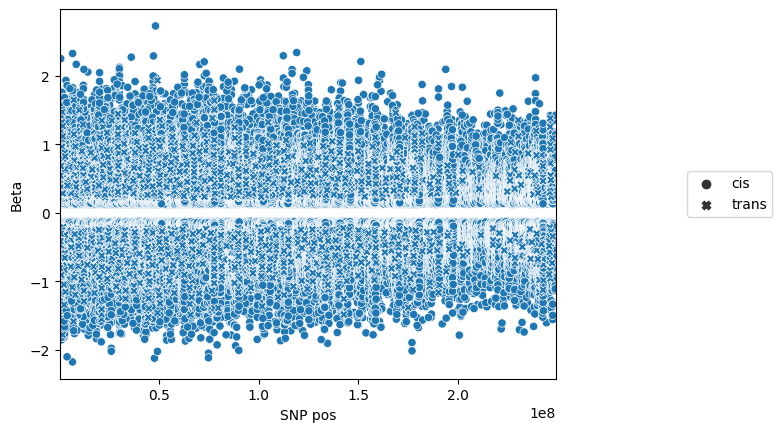

In [92]:
manhattan_plot(data)

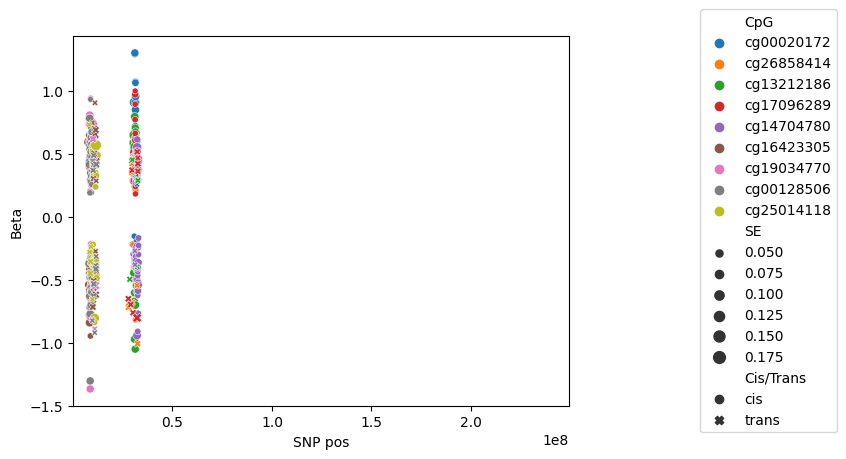

In [93]:
manhattan_plot(data,
               epi_pos,
               sum_stat,
               sum_stat_min,
               sum_stat_error,
               assoc_type,
               cpg_ids)

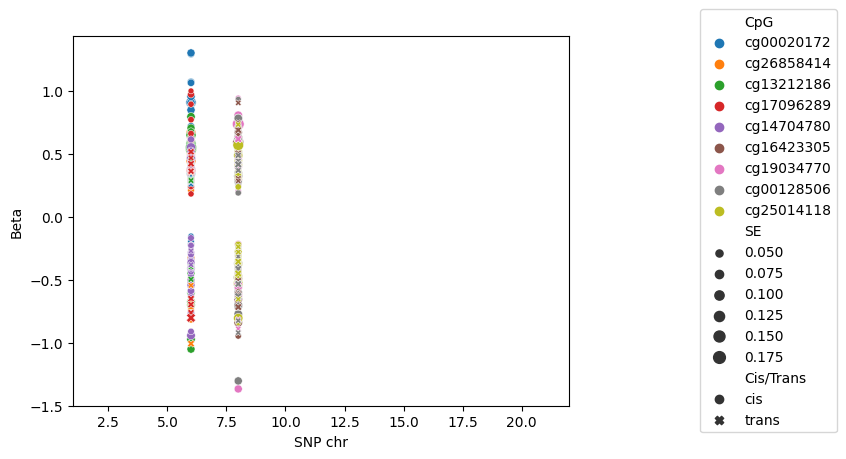

In [94]:
manhattan_plot(data,
               "SNP chr",
               sum_stat,
               sum_stat_min,
               sum_stat_error,
               assoc_type,
               cpg_ids)

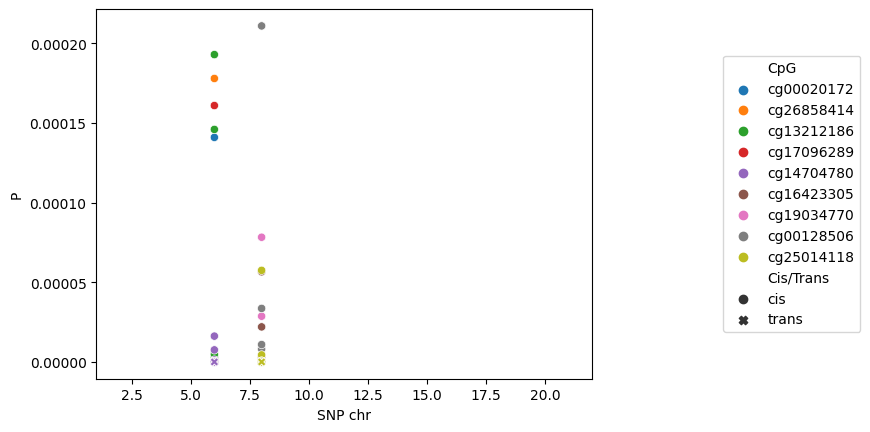

In [95]:
manhattan_plot(data,
               "SNP chr",
               "P",
               sum_stat_min,
               None,
               assoc_type,
               cpg_ids)

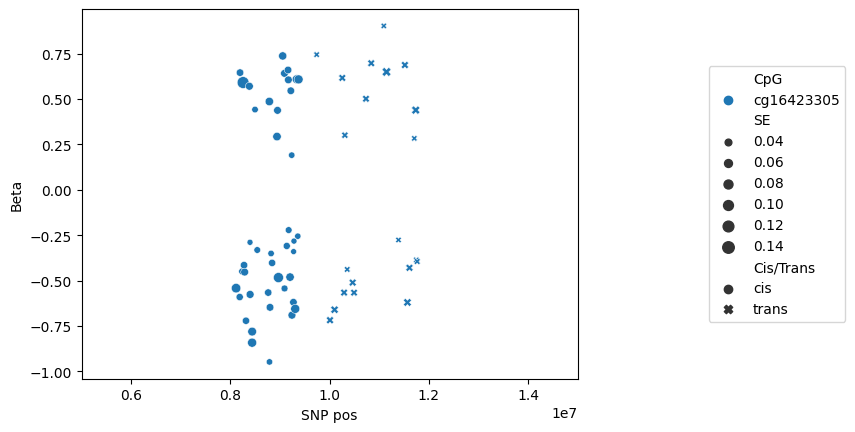

In [96]:
manhattan_plot(data,
               epi_pos,
               sum_stat,
               sum_stat_min,
               sum_stat_error,
               assoc_type,
               ["cg16423305"],
                x_range)